<a href="https://colab.research.google.com/github/yajima-yasutoshi/DataMinig/blob/main/20231122/%E5%9B%9E%E5%B8%B0%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# データマイニング第9回（2023/11/22）

#本日の講義の目的

回帰分析に関する説明を行う。



## 準備

In [1]:
# インストール
!pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 31.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=a22061ed78dedaf94a5c511413c809001fa258a89d7d0aaa28220cd92c2417a2
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns

from sklearn.linear_model import LinearRegression

In [5]:
# 読み込むファイルを指定する
file_path = '/content/drive/MyDrive/周南公立大学/講義/データマイニング/データ/回帰.xlsx'

# 今回は、df という変数に読み込むことにする
df = pd.read_excel(file_path)
df

,日付,最高気温,来店人数
0,2023-05-10,24.1,690
1,2023-05-11,27.2,640
2,2023-05-12,20.0,510
3,2023-05-13,23.0,560
4,2023-05-14,21.4,600
5,2023-05-15,20.9,420
6,2023-05-16,21.8,530
7,2023-05-17,23.4,560
8,2023-05-18,23.9,650
9,2023-05-19,25.3,570



**明日の最高気温が 24.5 度である場合に、来店者数は何名くらいか予測したい**

In [7]:
df.sort_values(by='最高気温')

,日付,最高気温,来店人数
2,2023-05-12,20.0,510
5,2023-05-15,20.9,420
4,2023-05-14,21.4,600
6,2023-05-16,21.8,530
3,2023-05-13,23.0,560
7,2023-05-17,23.4,560
8,2023-05-18,23.9,650
0,2023-05-10,24.1,690
9,2023-05-19,25.3,570
1,2023-05-11,27.2,640


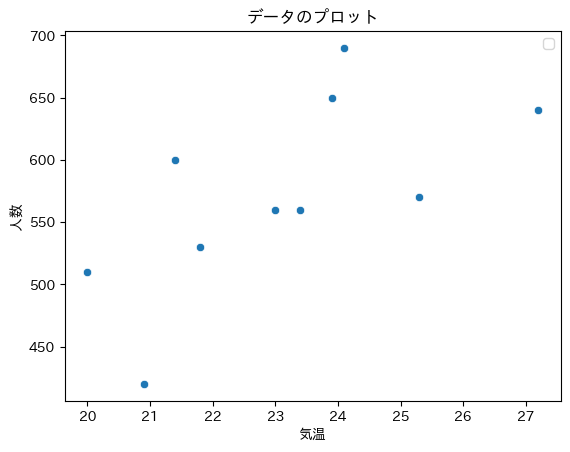

In [9]:
# データのプロット
# 元のデータをプロットします。
sns.scatterplot(data=df, x = '最高気温', y = '来店人数')
plt.title('データのプロット')
plt.xlabel('気温')
plt.ylabel('人数')
plt.legend()
plt.show()

Coefficient: [[23.24375295]]
Intercept: [36.06930693]


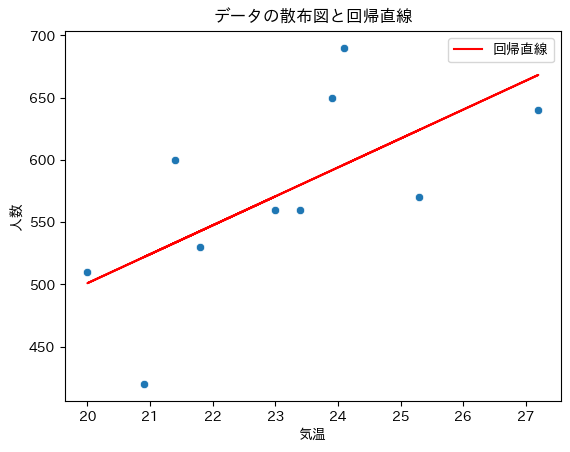

In [16]:
# 学習ステップ
# 線形回帰モデルを作成し、データにフィットさせます。
x = df[['最高気温']]
y = df[['来店人数']]
model = LinearRegression()
model.fit(x,y)

# 学習したパラメータを出力
print(f"Coefficient: {model.coef_}")
print(f"Intercept: {model.intercept_}")

# 学習結果のプロット
# 学習によって得られた線をプロットします。
sns.scatterplot(data=df, x = '最高気温', y = '来店人数')
# plt.scatter(x, y, label='データ')
plt.plot(x, model.predict(x), color='red', label='回帰直線')
plt.title('データの散布図と回帰直線')
plt.xlabel('気温')
plt.ylabel('人数')
plt.legend()
plt.show()

In [ ]:
# 学習したパラメータを出力
a = model.coef_
b = model.intercept_

In [ ]:
a[0]

In [ ]:
b

In [ ]:
# 予測ステップ
# 新しいデータに対する予測を行います。
new_x = np.array([[24]])
predicted_y = model.predict(new_x)
print(f"Predicted Y for X=7: {predicted_y}")

In [ ]:
# 新しいデータ点と予測結果をプロット
plt.scatter(x, y, label='データ')
plt.scatter(new_x, predicted_y, color='red', label='New Data Point', s=150)  # sパラメータでサイズを調整
plt.plot(x, model.predict(x), color='red', label='回帰直線')

# 新しいデータ点の座標を表示
plt.annotate(f'({new_x[0][0]:.2f}, {predicted_y[0][0]:.2f})',
             (new_x[0][0], predicted_y[0][0]),
             textcoords="offset points",
             xytext=(40,-30),  # 座標をずらす
             ha='center',
             fontsize=16)  # フォントサイズを大きく

plt.title('予測')
plt.xlabel('気温')
plt.ylabel('人数')
plt.legend()
plt.show()


# Tips データを用いた回帰の例

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

# データセットを読み込む（ここではSeabornの内蔵データセット'tips'を使用）
df = sns.load_dataset('tips')
df.info()

### データの説明
あるレストランでのチップ金額のデータ。

主な項目は以下の通り。

項目 | 説明
-- | --
total_bill | 総額（食事代+チップ）
tip        | チップの額
sex        | 性別
smoker     | 喫煙者かどうか
day        | 曜日
time       | 昼か夜か
size       | テーブルの人数

以下では説明のため、tip, total_bill, size の3項目を使い、
total_bill と sizeから tip を予測することを行います。

In [ ]:
#説明のため項目を減らす
df = df[['tip','total_bill','size']]
df.info()

In [ ]:
# データの先頭を表示して確認
df.head(10)

## 回帰モデルの作成

In [ ]:
# 必要なライブラリをインポート
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 特徴量と目的変数を選択（ここではtotal_bill と size を特徴量、tipを目的変数とする）
X = df[['total_bill','size']]
y = df['tip']

# 線形回帰モデルを作成
model = LinearRegression()

# モデルを訓練
model.fit(X, y)

# y_pred = model.predict(X_test)


In [ ]:
# 学習したパラメータを出力
a = model.coef_
b = model.intercept_


In [ ]:
a

In [ ]:
b

In [ ]:
# 予測したいデータを入力
X_test = pd.DataFrame( data =
                      { 'total_bill' : [30.0, 50],
                        'size'       : [3,    2]}
                       )
X_test

In [ ]:
# テストデータで予測
y_pred = model.predict(X_test)
y_pred

# カテゴリ変数を使った回帰


In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# データの読み込み
df = sns.load_dataset('tips')

In [ ]:
df.info()

In [ ]:
# データの相関を確認（Seabornのpairplotを使用）
sns.pairplot(df)
plt.show()

In [ ]:
df.nunique()

In [ ]:
df = df[['day']]
df

In [ ]:
df['day'].unique()

カテゴリ数が4個の場合であれば、3項目の数値型

In [ ]:
enc_df = pd.get_dummies(df[['day']], drop_first=True)
enc_df

In [ ]:
#from pandas.core.dtypes.common import ensure_float
#enc = OneHotEncoder( drop='first', sparse_output=False )
#
#enc_features = enc.fit_transform(df[['day']])
#enc_df = pd.DataFrame(enc_features, columns=enc.get_feature_names_out(['day']))
#
#enc_df

In [ ]:
# データの読み込み
df = sns.load_dataset('tips')

# カテゴリ変数をOne-Hotエンコーディング
# encoder = OneHotEncoder(drop='first', sparse_output=False)
# encoded_features = encoder.fit_transform(df[['sex', 'smoker', 'day', 'time']])
encoded_df = pd.get_dummies(df[['sex', 'smoker', 'day', 'time']], drop_first=True)

# エンコードされたデータと元のデータを結合
df = pd.concat([df, encoded_df], axis=1)

In [ ]:
df

In [ ]:
# 特徴量とターゲット変数を選択
X = df[['total_bill', 'size', 'sex_Female', 'smoker_No', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Dinner']]
y = df['tip']

# データを訓練セットとテストセットに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 線形回帰モデルの作成と訓練
model = LinearRegression()
model.fit(X_train, y_train)

# テストデータで予測
y_pred = model.predict(X_test)

# 評価（MSE）
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


In [ ]:
# 特徴量とターゲット変数を選択
X = df[['total_bill', 'size', 'sex_Female', 'smoker_No', 'time_Dinner']]
y = df['tip']

# データを訓練セットとテストセットに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 線形回帰モデルの作成と訓練
model = LinearRegression()
model.fit(X_train, y_train)

# テストデータで予測
y_pred = model.predict(X_test)

# 評価（MSE）
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

In [ ]:
# 説明変数を変化させて、精度が向上する様子をグラフで示す
features = ['total_bill','size', 'sex_Female', 'smoker_No', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Dinner']
accuracies = []

for feature in features:
    X_temp = X.drop(feature, axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X_temp, y, test_size=0.2, random_state=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies.append(mean_squared_error(y_test, y_pred))

# グラフを描画
plt.figure(figsize=(10, 6))
sns.barplot(x=features, y=accuracies)
plt.xlabel('Dropped Feature')
plt.ylabel('Accuracy')
plt.title('Accuracy after Dropping Each Feature')
plt.show()